El  objetivo de nuestro trabajo es predecir la edad de una zarigüeya hembra a partir del tamaño de su craneo. Segun la revista de  Biologia tropical pag 313-320 "crecimiento y desarrollo  del craneo en marsupiales" Lopez R  (1997) en  mamíferos  como la zarigüeya, el craneo se desarolla a medida que el animal crece, por ejemplo, si el craneo es pequeño y menos desarollado podemos asegurar que es una zarigüeya joven, pero si por el contrario el craneo es más grande y robusto la zarigüeya esta en una etapa adulta. Aunque hay muchas formas de saber la edad de una zarigüeya a partir de sus caracteristicas fisicas, nosotros lo vamos a hacer a partir del tamaño de su craneo.

El estudio de este problema es importante, pues tiene implicaciones ecológicas y conservativas dado que al saber cuantas zarigüeya jovenes o adultas hay en cierta poblacion ayuda a los ecologistas  a comprender su estructura poblacional, su taza de  reproducción y supervivencia y es muy útil para estrategias de conservación 

Determinar la edad de una zarigüeya es una tarea dificil y solo se puede llegar a conocer a partir de sus caracteristicas fisicas y en algunas veces de su comportamiento. Una vez que la zarigüeya ha alcanzado la edad adulta, es casi imposible determinar la edad sin llevarla al veterinario. A menudo, es necesario determinar la edad de una zarigüeya abandonada para medir su probabilidad de supervivencia. 



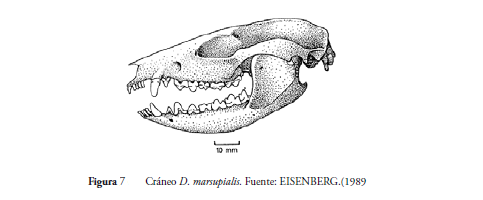


Referencias: Clayton Yuetter articulo  como " como saber la edad de una zarigüeya"

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./possum.csv')


In [60]:
df.sample(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
90,91,7,other,m,3.0,97.8,59.6,89.0,38.0,65.5,48.0,15.0,26.0,32.0
22,23,1,Vic,f,4.0,92.5,56.1,89.0,36.0,72.8,53.3,15.4,28.0,35.0
16,17,1,Vic,f,1.0,94.7,67.7,89.5,36.5,73.2,53.2,14.7,29.0,31.0
79,80,6,other,m,1.0,86.7,52.6,84.0,38.0,62.3,44.8,15.0,23.5,30.5
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
10,11,1,Vic,f,9.0,93.3,57.2,89.5,39.0,77.2,51.3,14.9,31.0,34.0
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
21,22,1,Vic,m,3.0,96.3,58.5,91.0,39.5,73.5,52.1,16.2,28.0,36.0
80,81,6,other,m,3.0,90.6,56.0,85.5,38.0,65.6,41.7,17.0,27.5,35.0


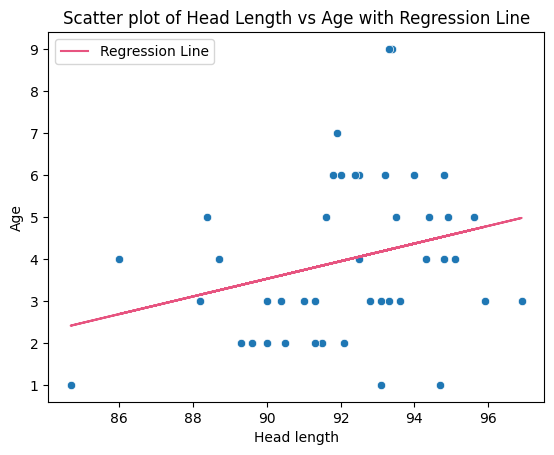

In [61]:

# Assign x and y with on-the-go filtering for females
x = df.loc[df['sex'] == 'f', 'hdlngth'].values.reshape(-1, 1)  # Reshape x to 2D array
y = df.loc[df['sex'] == 'f', 'age']

# Create a scatter plot of the data
sns.scatterplot(x=x.flatten(), y=y)  # flatten x for plotting in seaborn

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)  # Fit the model on x and y

# Get the predicted values (regression line)
y_prediccion = model.predict(x)

# Plot the regression line (red line)
plt.plot(x, y_prediccion, color='#e75480', label='Regression Line')

# Add labels and a title (optional)
plt.xlabel('Head length')  # Adjust the label based on your data
plt.ylabel('Age')
plt.title('Scatter plot of Head Length vs Age with Regression Line')

# Show the legend (optional)
plt.legend()

# Show the plot
plt.show()




Tener en cuenta que los datos que me arroja el dataset esta en mm. Se recomienda poner la longitud del craneo alrededor de 74 mm dado que  segun los datos este es el craneo mas pequeño que corresponde al  de una zarigüeya bebe 

In [62]:
mse = ((y - y_prediccion) ** 2).mean()


print(mse)


3.4108518327250095


In [73]:
print(model.predict([[74]]))

[0.16088224]
